# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [5]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(804, 12)

In [8]:
df.nunique()

Price       798
Mileage     791
Make          6
Model        32
Trim         47
Type          5
Cylinder      3
Liter        16
Doors         2
Cruise        2
Sound         2
Leather       2
dtype: int64

In [9]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [11]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [12]:
corr=df.corr()
corr.shape

(8, 8)

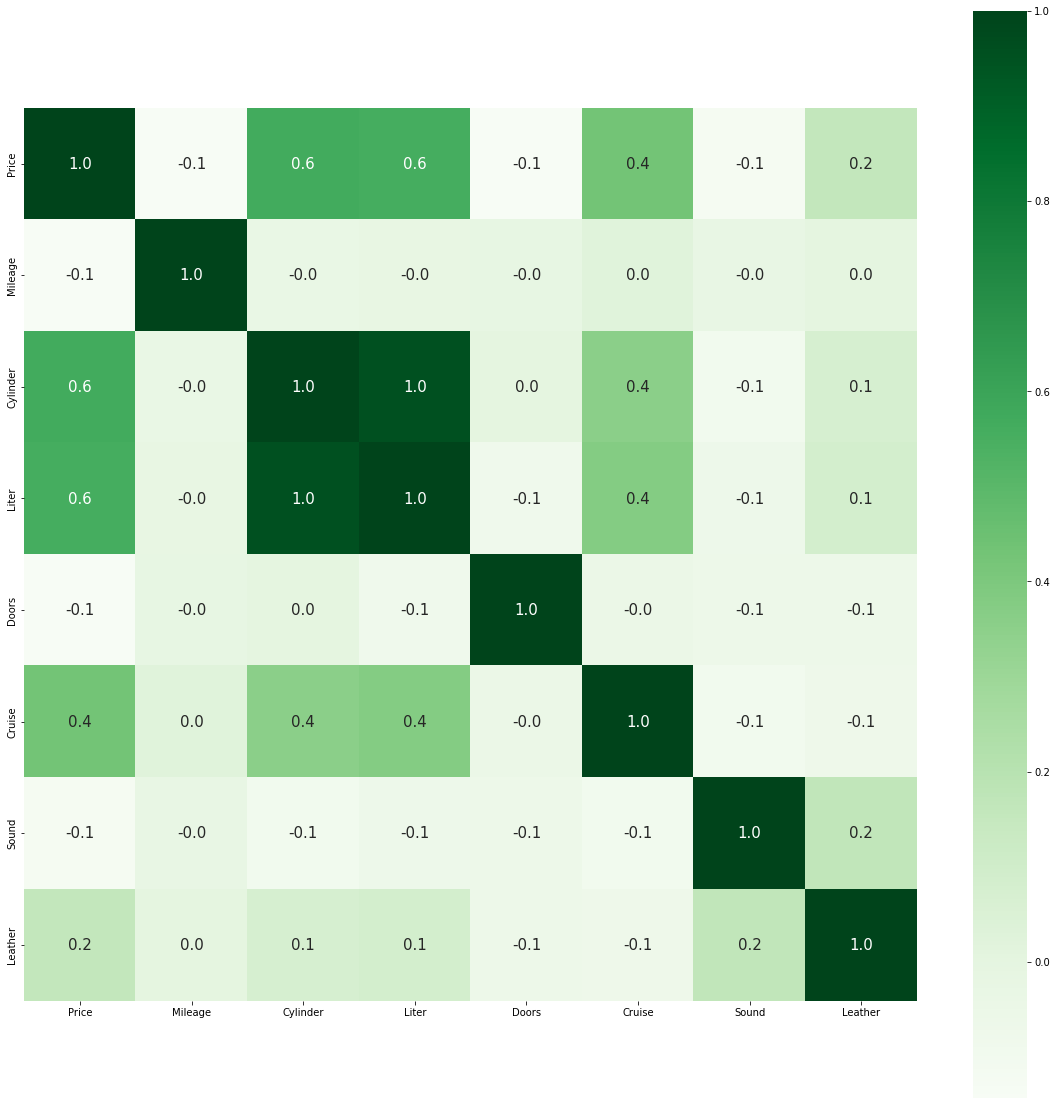

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Tasks, Part 1



Find the linear regression equation for mileage vs price.

Chart the original data and the equation on the chart.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

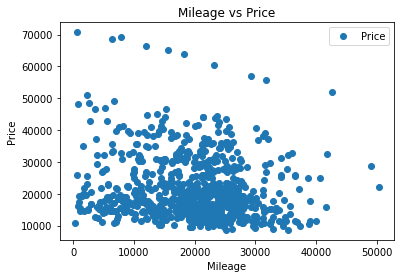

In [14]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [15]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


there is no linear correlation between the mileage and price.

In [16]:
df.Mileage.values

array([ 8221,  9135, 13196, 16342, 19832, 22236, 22576, 22964, 24021,
       27325, 10237, 15066, 16633, 19800, 23359, 23765, 24008, 26034,
       32896, 34665,  8970, 10577, 14363, 16508, 18908, 19467, 21394,
       22596, 24469, 25245, 15755, 16235, 18147, 22102, 23612, 24439,
       25212, 26779, 27096, 29649,  2992, 10036, 18339, 19592, 21797,
       23852, 25040, 25052, 25464, 27830, 17353, 17787, 19562, 20137,
       20158, 23767, 24323, 27839, 29187, 31324,  2308, 10014, 18910,
       20105, 20453, 22287, 23237, 23798, 25489, 25564,  4695,  9795,
       12052, 13050, 17335, 17480, 24027, 25387, 25869, 37128,  2202,
        6685, 15343, 21341, 21367, 23371, 23751, 24052, 25199, 30082,
        6598, 10625, 11013, 14937, 17094, 17870, 18449, 21039, 21056,
       27484, 14095, 14743, 16041, 17138, 18661, 21966, 24415, 25163,
       25339, 25421,  5499,  8125, 12791, 14452, 21593, 22211, 25153,
       26250, 36074, 41829,  6447, 10555, 11975, 13449, 17508, 18661,
       20910, 23124,

there is no strong linear regression in this data

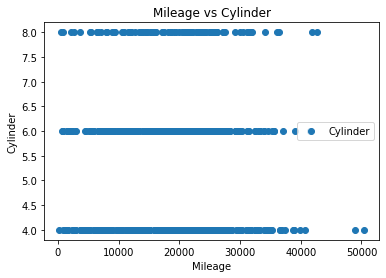

In [26]:
df.plot(x='Mileage', y='Cylinder', style='o')
plt.title('Mileage vs Cylinder')
plt.xlabel('Mileage')
plt.ylabel('Cylinder')
plt.show()

In [27]:
df[['Mileage','Cylinder']].corr()


,Mileage,Cylinder
Mileage,1.000000,-0.029461
Cylinder,-0.029461,1.000000


In [30]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  


LinearRegression()

In [35]:
car_mileage = df[['Mileage']]
car_price = df['Price']

In [36]:
regressor.fit(car_mileage,car_price)

LinearRegression()

In [37]:
regressor.intercept_

24764.559006061685

In [39]:
regressor.coef_[0]

-0.1725205027912493

In [41]:
print(f'The linear regression equation mileage vs price : {regressor.coef_[0]:.4f}*x + {regressor.intercept_:.4f}')

The linear regression equation mileage vs price : -0.1725*x + 24764.5590


In [42]:
equ=regressor.coef_[0]*car_mileage+ regressor.intercept_

<function matplotlib.pyplot.show(*args, **kw)>

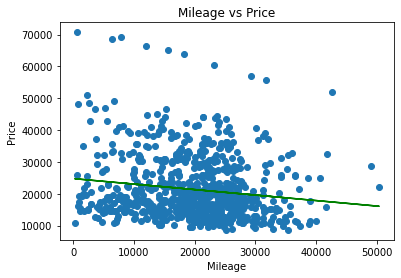

In [44]:
plt.scatter(car_mileage, car_price)
plt.plot(car_mileage , equ, c = 'green')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show

In [46]:
r_squares=regressor.score(car_mileage,car_price)
print(r_squares)

0.02046344732348926


r2 is less than 0.8 so this is not a good model


task2



#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [47]:

columns = ['Mileage' , 'Cylinder' , 'Liter' , 'Doors', 'Cruise' , 'Sound', 'Leather']
car_columns = df[columns]


In [48]:
df[columns]

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [49]:
price = df['Price']

In [50]:
price

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()

In [52]:
regressor.fit(df[columns],car_price)

LinearRegression()

In [53]:
regressor.coef_

array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
        6.28899715e+03, -1.99379528e+03,  3.34936162e+03])

In [54]:
regressor.intercept_


6758.755143598106

In [57]:
regressor.score(car_columns, price)

0.4462643536728379

In [58]:
print(f'The linear regression equation car_columns  vs price : {regressor.coef_[0]:.4f}*x + {regressor.intercept_:.4f}')

The linear regression equation car_columns  vs price : -0.1697*x + 6758.7551


In [59]:
r_squares=regressor.score(car_columns,price)
print(r_squares)

0.4462643536728379


r2 value should be above 0.8 to be a good fit model here it is 0.4 so this is not a good fit

task3

In [61]:
print('Intercept:', regressor.intercept_)
print('Coefficient:',regressor.coef_)


Intercept: 6758.755143598106
Coefficient: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
